# User's Guide, Chapter 2: Notes

Notated music, by its very name, consists of a bunch of notes that are put one after another or simultaneously on a staff. There are other things, clefs, key signatures, slurs, etc. but the heart of music is the notes; so to get anywhere in music21 you’ll need to know what the toolkit thinks about notes and how to work with them. 

Go ahead and start IDLE or type “python” at the command line (Terminal on the Mac or “run: cmd” on Windows) and let’s get started.

## Creating and working with Notes

The music21 concept of a standard note is contained in the :class:`~music21.note.Note` object, which is found in the
`note` module. 

**Read this if you're new to Python** *(others can skip ahead):* Notice the 
difference between object names and
module names.  Modules, which can contain one, many, or even
zero objects, always begin with a lowercase letter.  Music21's
objects always begin with a captial letter.  So the `Note` object
is found in the `note` module.  The distinction between uppercase
and lowercase is crucial to Python: if you type the name of an
object with the wrong case it won't know what to do and won't
give you any help in distinguishing between them.

In the `note` module, there are other classes besides `note.Note`.
The most important one is `note.Rest`, which as you imagine
represents a rest.  If we load music21 with the command:

In [1]:
from music21 import *

then you'll now be able to access the `note` module just by
typing `note` at any command line.

If you get something like this you'll have access to the music21
`note` module any time you type `"note"`.  The filename after
"from 'D:\\music21files...'" will differ for you.  It will show
you where you have music21 installed (if you ever forget where
you have music21 installed, this is an easy way to figure it out).  
As long as it ends in `note.pyc` or `note.py` or something like that
you're fine.

If you want to know what else the `note` module contains besides
the Note and Rest objects you can type "`dir(note)`" to find out:

In [2]:
dir(note)

['GeneralNote',
 'Lyric',
 'LyricException',
 'NotRest',
 'NotRestException',
 'Note',
 'NoteException',
 'Rest',
 'SlottedObjectMixin',
 'SpacerRest',
 'Test',
 'TestExternal',
 'Unpitched',
 '_DOC_ORDER',
 '_MOD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'base',
 'beam',
 'common',
 'copy',
 'duration',
 'editorial',
 'environLocal',
 'environment',
 'exceptions21',
 'expressions',
 'interval',
 'noteheadTypeNames',
 'pitch',
 'six',
 'stemDirectionNames',
 'tie',
 'unittest',
 'volume']

Some of the things in this list are classes of notes -- they are capitalized. Other classes are things that we'll get to later, like
:class:`~music21.note.Lyric` objects.
(By the way: I'm highlighting the names of
most objects so they become links to the full documentation for the object. You 
can read it later when you're curious, frustrated, or *Mad Men* is a re-run; you
certainly don't need to click them now).

### (Advanced digression):

   If you're more of a Python guru and you're afraid of "polluting your namespace,"
   instead of typing "`from music21 import *`" you can type:

In [3]:
import music21

in which case instead of using the word `note`, you'll need to call it `music21.note`

If you are a Python guru, you already knew that.  Probably if you didn't already 
know that, but you've heard about "polluting your namespace," you have a Python
guru friend who has screamed, "Never use `import *`!"  Trust me for now that
this tutorial will be easier if you ignore your friend for a bit; by the end of
it you'll know enough to be able to follow whatever advice seems most natural to
you.

*(Back from the Python digression and especially the digression of the digression):* 

Okay, so now you now enough about modules and
objects.  Let's create a `note.Note` object.  How about the F at the top of the
treble clef staff:

In [4]:
f = note.Note("F5")

We use the convention where middle-C is C4, the octave above it is C5, etc.

Now you have a Note.  Where is it?  It's stored in the variable `f`.  You can
verify this just by typing `f`:

In [5]:
f

<music21.note.Note F>

And you can see that it's actually an F and actually in octave 5 by requesting the
`.name` and `.octave` attributes on the `Note` object, `f`:

In [6]:
f.name

'F'

In [7]:
f.octave

5

And there's an attribute called `.pitch` which returns another object:

In [8]:
f.pitch

<music21.pitch.Pitch F5>

Well, that didn't tell you anything you didn't know already! Let's look at
some other attributes that might tell you something you didn't know.  Some of them are sub-attributes, meaning they take two dots. Here's a sub-attribute on `pitch`, which we just said was itself an object, called `.frequency`:

In [9]:
f.pitch.frequency

698.456462866008

And another sub-attribute called `pitch.pitchClassString`

In [10]:
f.pitch.pitchClassString

'5'

That's a bit better! So an f is about 698hz (if A4 = 440hz), and it is pitch
class 5 (where C = 0, C# and Db = 1, etc.).

A couple of things that you'll notice:

1. Your `frequency` probably has a bunch more numbers instead of ending with
    "...".  Mine gives me "698.456462866008".  In the docs, we'll sometimes
    write "..." instead of putting in all those numbers (or long strings); it's
    partly a way of saving space, and also because the length of a long number
    and even the last few digits will differ from computer to computer depending
    on whether it's 32-bit or 64-bit, Mac or PC, number of sunspots last Autumn, etc.
    Since I don't know what computer you're using, don't worry if you get slightly
    different results.
    
2. There are single quotes around some of the output (like the `'F'` in `f.name`) and
    none around others (like the `5` in `f.octave`).  The quotes mean that that attribute
    is returning a String (a bunch of letters or numbers or simple symbols).
    The lack of quotes means that it's returning a number (either an integer
    or if there's a decimal point, a sneakingly decimal-like thingy called a
    `float` (or "floating-point number") which looks and acts just like a decimal,
    except when it doesn't, which is never when you'd expect. 

   *(The history
        and theory behind* `floats` *will be explained to you at length by any
        computer scientist, usually when he or she is
        the only thing standing between you and the bar at a party. Really, we 
        shouldn't be using them anymore, except for the fact that for our computers 
        they're so much faster to work with than decimals.)*

The difference between the string `'5'` and
    the number `5` is essential to keep in mind.  In Python (like most 
    modern programming languages) we use two equal signs (`==`) to ask if
    two things are equal.  So:

In [11]:
f.octave == 5

True

That's what we'd expect.  But try:

In [12]:
f.pitch.pitchClassString == 5

False

That's because `5 == '5'` is `False`.  (There are some lovely languages
    such as JavaScript and Perl where it's `True`; Python's not one of them.
    This has many disadvantages at first, but as you go on, you might see
    this as an advantage).  So to see if `f.pitchClassString` is `'5'` we need
    to make `'5'` a string by putting it in quotes:

In [13]:
f.pitch.pitchClassString == "5"

True

In Python it doesn't matter if you put the `5` in single or double quotes:

In [14]:
f.pitch.pitchClassString == '5'

True

`pitchClassString` tells you that you should expect a string, because we've
    put it in the name.  There's also a `.pitch.pitchClass` which returns a number:

In [15]:
f.pitch.pitchClass

5

These two ways of getting a pitch class are basically the same for the note "F" 
    (except that one's a string
    and the other is an integer) but for a B-flat, 
    which is `.pitchClass` 10 and `.pitchClassString` "A", it makes a difference.

Let's go ahead and make that B-flat note.  In `music21`, sharps are "#" as you
might expect, but flats are "-".  That's because it's otherwise hard to tell the
difference between the `Note` "b" (in this instance, you can write it in upper or
lower case) and the symbol "flat".  So let's make that B-flat note:

In [38]:
bflat = note.Note("B-2")

I've called the variable "`bflat`" here.  You could call it "`Bb`" if you want or
"`b_flat`", but not "`b-flat`" because dashes aren't allowed in variable names:

In [39]:
b-flat = note.Note("B-2")

SyntaxError: can't assign to operator (<ipython-input-39-d519b3e88921>, line 1)

Since this note has an accidental you can get it by using the `.pitch.accidental` subproperty:

In [40]:
bflat.pitch.accidental

<accidental flat>

Here we have something that isn't a number and doesn't have quotes around it.  That
usually means that what `.accidental` returns is another object -- in this case an
:class:`~music21.pitch.Accidental` object.  As we saw above, objects have attributes
(and other goodies we'll get to in a second) and the `Accidental` object is no 
exception.  So let's make a new variable that will store `bflat`'s accidental:

In [41]:
acc = bflat.pitch.accidental

We'll get to all the attributes of `Accidental` objects in a bit, but here are two of
them: `.alter` and `.displayLocation`.  You'll use the first one quite a bit: it shows
how many semitones this `Accidental` changes the `Note`:

In [42]:
acc.alter

-1.0

Since this `Accidental` is a flat, its `.alter` is a negative number.  Notice that it's also not an integer,
but a float.  That might indicate that music21 supports things like quarter-tones,
and in this case you'd be right.  

Look back at the two lines "`acc = bflat.pitch.accidental`" 
and "`acc.alter`".  We set `acc` to be the value of `bflat.pitch`'s `.accidental` attribute
and then we get the value of that variable's `.alter` attribute. We could have skipped the first step altogether and "chained" the
two attributes together in one step:

In [43]:
bflat.pitch.accidental.alter

-1.0

In [44]:
acc.displayLocation

'normal'

Good to know that we've set a sensible default.  If you want to have the accidental
display above the note, you'll have to set that yourself:

In [45]:
acc.displayLocation = 'above'
acc.displayLocation

'above'

Our variable `"acc"` is the **exact** accidental that is attached to the B-flat
Note stored as `bflat`.  It's not a flat that's similar to B-flat's flat, but
the same one. (in computer-speak, `acc` is a *reference* to `.accidental`). So
now if we look at the `.displayLocation` of `bflat.pitch.accidental` we see that it
too is set to the silly "above" position:

In [46]:
bflat.pitch.accidental.displayLocation

'above'

Python is one of those cool computer languages where if an object doesn't have
a particular attribute but you think it should, you can add it to the object
(some people find that this makes objects messy, but I don't mind it).  For 
what I hope are obvious reasons, the `Note` object does not have an attribute called
"`wasWrittenByStockhausen`".  So if you try to access it, you'll get an error:

In [47]:
bflat.wasWrittenByStockhausen

AttributeError: 'Note' object has no attribute 'wasWrittenByStockhausen'

But if you set the value of that weird attribute, you can use it later:

In [48]:
bflat.wasWrittenByStockhausen = True
f.wasWrittenByStockhausen = False

Then you can write an “if” statement to see if this is True or not:

In [49]:
if bflat.wasWrittenByStockhausen == True:
    print("Hope you're enjoying Sirius!")

Hope you're enjoying Sirius!


Note that in the last line above you will need to put the spaces before the “print” command; Python uses spaces to keep track of what is inside of an if statement (or lots of other things) and what isn’t. 

(If you don’t get the Stockhausen joke, see: <a href="http://en.wikipedia.org/wiki/Karlheinz_Stockhausen#Sirius_star_system">wikipedia</a> . )

Nothing will print for the note f since we set .wasWrittenByStockhausen to False:

In [50]:
if f.wasWrittenByStockhausen == True:
    print("I love Helicopters!")

At this point you might be tired of all this programming and just want to see or play your damn note! If you’ve installed a MusicXML reader such as MuseScore, Finale, Sibelius, or Finale Notepad, you can type:

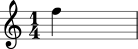

In [51]:
f.show()

and see it. We make the default note length a quarter-note.  We'll get to
other note lengths in a minute.  Notice that we put in a sensible clef
also, since otherwise you won't know that this note really is `F5`.  

If you want to hear it instead (and you're
on Windows or Unix or an older-Mac (10.5 or older)) type:

In [52]:
f.show('midi') 

You may need to wait a few seconds when hitting play if you're reading these docs online since the "grand piano" sound has to load and that's about a megabyte long.

Maddeningly, Apple removed MIDI support in the version of QuickTime
(QuickTime X) included in OS X 10.6 (Snow Leopard) and above (including
Mountain Lion), so you'll need to get the older QuickTime 7 from <a href="http://support.apple.com/kb/DL923">appleQuicktime</a> to
make that work.

When we typed `f.octave` we didn't put any parentheses after it, but when we
call `f.show()` we always need to put parentheses after it, even if there's
nothing in them (in which case, we'll use the default `.show` format, which
is usually `musicxml`).

`.show()` is what’s called a method on the `Note` object, while `.octave` is an attribute. Think of methods as like verbs (“O Note: show thyself!”) while attributes are like adjectives that describe the object. All methods need to have parentheses after them and inside the parentheses you can usually put other things (“parameters”) that control how to perform the action. For instance, let’s create a new note, `D` by transposing our B-flat up a major-third (“M3”):

In [53]:
d = bflat.transpose("M3")
d

<music21.note.Note D>

In [54]:
bflat

<music21.note.Note B->

Instead of changing the original note, the `transpose()` method
"returns" (that is, spits out) a new `note.Note`
object that represents the operation of transposing it up (or down if you
want to try "-M3") a certain interval. 

If you want to change `bflat` itself, you can add "inPlace = True" to the
parameters of `.transpose()` separating it from the interval by a comma.
Let's take it up a perfect fourth:

In [55]:
bflat.transpose("P4", inPlace=True)
bflat

<music21.note.Note E->

Of course now `bflat` is a terrible name for our variable!  You could type
"`eflat = bflat`" and now you can call the note `eflat`.  But you'll probably not
need to do this too often.  By the way, music21 handles some pretty wacky intervals,
so if we go back to our variable `d` (which is still a `d` -- transposing bflat
in place didn't change it; they're not connected anymore, barely on speaking terms
even), let's transpose it up a doubly-diminished sixth:

In [56]:
whatNoteIsThis = d.transpose('dd6')
whatNoteIsThis

<music21.note.Note B--->

B-triple-flat! Haven't seen one of those in a <a href="http://www.music.vt.edu/musicdictionary/textt/Tripleflat.html"> while</a>! Let's check that note's
`.pitch.accidental.alter` and its `.pitch.accidental.name`.  These are sub-sub-properties, meaning that they have three dots in them:

In [57]:
whatNoteIsThis.pitch.accidental.alter

-3.0

In [58]:
whatNoteIsThis.pitch.accidental.name

'triple-flat'

One last thing: not every note has an accidental.  The `d` for instance doesn't
have one, so it returns `None`, which is a special value that puts nothing on the 
output. 

In [59]:
d.pitch.accidental

If you want to be sure that it is `None`, you can print the value:

In [60]:
print(d.pitch.accidental)

None


Since `d.accidental` is `None` does this mean that `d.accidental.name` is `None` too?

In [61]:
d.pitch.accidental.name

AttributeError: 'NoneType' object has no attribute 'name'

Nope! In fact it creates an error (which we'll also call "raising an Exception" 
for reasons that will become clear soon).  That's because instead of 
getting an `Accidental` object from `.accidental` like we did before, we got a
`NoneType` object (i.e., `None`).  `Accidental` objects have an attribute called `name`, 
but the object `None` doesn't (it's like trying `.wasWrittenByStockhausen` before you've
defined it as an attribute).  

When you're just typing in IDLE
or the command line, raising an Exception is no big deal, but when you're running
a program, Exceptions will usually cause the program to crash (i.e., stop working).
So we try to make sure that our `Notes` actually have `Accidentals` before we 
print the `.accidental`'s name, and we do that by using another `if` statement:

In [62]:
if d.pitch.accidental is not None:
    print(d.pitch.accidental.name)

This way is safer because we will only try to print `d.pitch.accidental.name` if 
`d.pitch.accidental` is not `None`.  Since it *is* `None` in this case, Python will
never try the second line (which would otherwise cause it to crash).

If for some reason `d` did not have `.pitch`, we would need to test to see if that was `None` before checking the subproperty to see if it had an `.pitch.accidental`.

This might be a good place to take a rest for a second.  So make a `Rest`:

In [63]:
r = note.Rest(type='whole')

Be sure to put the "()" (double parentheses) signs after `note.Rest` otherwise
strange things will happen (technically you get a reference to the class `note.Rest`,
which will come in handy in about 10 chapters, but not right now).

You can `.show()` it as a '`musicxml`' file of course... 

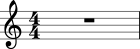

In [64]:
r.show()

...but if you try to hear it 
as a '`midi`' file, don't expect to be overwhelmed. 

A `Rest` is an object type that does not have `.pitch` on it, so naturally it doesn't have `.pitch.accidental` either:

In [65]:
r.pitch

AttributeError: 'Rest' object has no attribute 'pitch'

One last thing: notice that we never used a variable name called "`note`" to
store a `note.Note` object.  **Don't do this**.  If you type something like this
(don't type this if you want to continue typing along with the user guide):

In [66]:
#_DOCS_SHOW note = note.Note("C#3")

Well now you're in a bind.  You've got your `Note` object stored as `note`, but
we *need* the `note` *module* in order to create new `Note` objects and now you have
no way of getting it. (this is the problem that "polluting the namespace" causes
that your Python guru friend might have warned you about).  So unless you're
_Amadeus's_ Emperor Joseph who complained that there were "too many notes,"
you're probably going to want to make more `note.Note` objects in the future,
so don't use `note` as a variable name. (The same goes with `pitch`, `scale`,
`key`, `clef`, and so on.  You'll see me use variable names like `myNote` and
`myClef` to avoid the problem).

Okay, now you have the basics of `Note` objects down, let's go on to :ref:`Chapter 3: Pitches and Durations <usersGuide_03_pitches>`.